In [19]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [15]:
# nice little module to import youtube videos!
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

In [16]:
#to use the url just pass it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split your data by male and female, for example you can load the data into 2 disctionary. other variables may be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that read the male files into races

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)
#add all female races to the dictionary
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)


In [17]:
from pandas.tools.plotting import scatter_matrix

In [21]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

In [22]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/Users/eliseowang/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
scatter_matrix (allmales['all'], s=300, figsize=(16, 16), diagonal='kde')

KeyboardInterrupt: 

KeyboardInterrupt: 

In [22]:
#scatter_matrix (allfemales['all'], s=300, figsize=(16, 16), diagonal='kde')

KeyboardInterrupt: 

KeyboardInterrupt: 

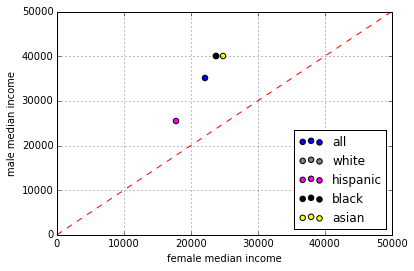

In [51]:
#female median income
salfA = allfemales['all']['Median income'][1]
salfW = allfemales['white']['Median income'][1]
salfH = allfemales['hispanic']['Median income'][1]
salfB = allfemales['white']['Median income'][1]
salfY = allfemales['asian']['Median income'][1]
#malse median income
salmA = allmales['all']['Median income'][1]
salmW = allmales['white']['Median income'][1]
salmH = allmales['hispanic']['Median income'][1]
salmB = allmales['white']['Median income'][1]
salmY = allmales['asian']['Median income'][1]
#plot all the female vs male median income dots
plt.scatter(salfA, salmA, s=30, c='b', label='all')
plt.scatter(salfW, salmW, s=30, c='grey', label='white')
plt.scatter(salfH, salmH, s=30, c='magenta', label='hispanic')
plt.scatter(salfB, salmB, s=30, c='black', label='black')
plt.scatter(salfY, salmY, s=30, c='yellow', label='asian')
plt.xlim((0, 50000))
plt.ylim((0, 50000))
plt.grid()
plt.xlabel('female median income')
plt.ylabel('male median income')
plt.legend(loc=4)
#plot the dividing line
plt.plot((0,50000), (0,50000), 'r--')